# Exploring F&B Product Launch Data In North America Region

Analysing New Trends in Flavors and SKU Optimization

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Reading all datasets


In [2]:
all_product_data = pd.read_csv('Product Launch Dataset.csv')
flavor = pd.read_csv('Flavor Classification Dataset.csv')
positioning = pd.read_csv('Positioning Category Mapping Dataset.csv')



In [3]:
print(all_product_data.shape[0])
all_product_data.head(5)


114689


,Product id,Flavor,Market Subcategory,Launch Date,Country,Region,Positioning
0,1,"Herbs, not specified; Fruit, not specified",Other Soft Drinks,01/01/2001,WE1,West Europe,"Low Calorie, Natural"
1,2,"Fruit, not specified",Carbonates,01/01/2001,WE2,West Europe,Convenience - Consumption
2,3,Lemon; Honey; Ginger,Juice & Juice Drinks,01/01/2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu..."
3,4,Mango; Passion Fruit,Juice & Juice Drinks,01/01/2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu..."
4,5,Mango,Juice & Juice Drinks,01/01/2001,WE2,West Europe,"100% Not from Concentrate, Convenience - Consu..."


In [4]:
flavor.head(5)

,Flavor_Group,Flavor
0,Alcohol,"Vodka, Citron"
1,Alcohol,Bacardi
2,Alcohol,"Bacardi, Gold"
3,Alcohol,"Bacardi, Silver"
4,Alcohol,"Beer, Ale"


In [5]:
positioning.head(5)

,Positioning Group,Positioning Subcategory
0,Age,Children (5-12 years)
1,Age,Seniors (55+)
2,Others,Economy
3,Choice,Halal
4,Choice,Kosher


### FILTERING DATA FOR NORTH-AMERICA REGION:
- The scope of this exercise involves analysis for North American region only. Hence I have filtered the data for North America region before performing any necessary data manipulations to create our analytical datasets, to reduce our computational inputs and outputs.

In [6]:
product_data = all_product_data[all_product_data['Region'] == 'North America'].drop(['Region'], axis = 1)
print(product_data.shape[0])
product_data.head(5)


20085


,Product id,Flavor,Market Subcategory,Launch Date,Country,Positioning
6,7,"Fruit, not specified",Drink Concentrates & Mixes,01/01/2001,NA1,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb"
8,9,"Cherry, Not specified; Vanilla, Not specified",Bottled Water - Flavoured,01/01/2001,NA1,Convenience - Packaging
9,10,"Orange, not specified",Juice & Juice Drinks,01/01/2001,NA1,"Low Calorie, Low Sugar"
10,11,"Superfruit, Pomegranate; Berry, Blackberry",Carbonates,01/01/2001,NA1,"Female, Antioxidant, Low Calorie, Low Carb, Su..."
14,15,"Superfruit, acai; Herbs, not specified",Juice & Juice Drinks,01/01/2001,NA2,"Heart Health, Antioxidant, Anti-Aging/Aging-We..."


In [7]:
print("Original flavor data: {}".format(flavor.shape[0]))

# Drop duplicates based on 'Flavors' and 'Flavor_Groups'
flavor = flavor.drop_duplicates(subset= ['Flavor', 'Flavor_Group'], keep='first')

print("Flavor data without duplicates: {}".format(flavor.shape[0]))

Original flavor data: 1453
Flavor data without duplicates: 1439


In [8]:
# Drop duplicates based on 'Positioning Group' and 'Positioning Subcategory'
positioning = positioning.drop_duplicates(subset= ['Positioning Group','Positioning Subcategory'], keep='first')

In [9]:
#Create a copy of_df_for_later
product_data_copy = product_data.copy()
flavor_copy = flavor.copy()
positioning_copy = positioning.copy()

### CREATING A PRODUCT FLAVOR GROUP-
 Explode the "Flavor" column in product data, which has multiple flavors seperated by ; into individual rows, with one flavor per row. 
- Convert "Flavor" column in product data to lower case and strip any extra whitespace
- Convert "Flavor" column in flavor data to lower case and strip any extra whitespace

In [10]:
# Explode the "Flavor" column in product data, which has multiple flavors seperated by ; into individual rows, with one flavor per row.
product_data['Extract_Flavors'] = product_data['Flavor'].str.split(';')
product_data = product_data.explode('Extract_Flavors').reset_index(drop=True)


# Convert 'Extract_Flavors' column to lowercase for case-insensitive matching
product_data['Extract_Flavors'] = product_data['Extract_Flavors'].str.lower()

# Remove extra spaces from both ends of each string in the 'Flavors' column
product_data['Extract_Flavors'] = product_data['Extract_Flavors'].str.strip()

#Drop Flavor column having multiple flavors and rename Extract_Flavors to Flavor
product_data = product_data.drop("Flavor",axis = 1).rename(columns = {'Extract_Flavors':'Flavor'}) 
product_data.head(5)

,Product id,Market Subcategory,Launch Date,Country,Positioning,Flavor
0,7,Drink Concentrates & Mixes,01/01/2001,NA1,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb","fruit, not specified"
1,9,Bottled Water - Flavoured,01/01/2001,NA1,Convenience - Packaging,"cherry, not specified"
2,9,Bottled Water - Flavoured,01/01/2001,NA1,Convenience - Packaging,"vanilla, not specified"
3,10,Juice & Juice Drinks,01/01/2001,NA1,"Low Calorie, Low Sugar","orange, not specified"
4,11,Carbonates,01/01/2001,NA1,"Female, Antioxidant, Low Calorie, Low Carb, Su...","superfruit, pomegranate"


In [11]:
# Convert "Flavor" column in flavor data to lower case and strip any extra whitespace
flavor['Flavor'] = flavor['Flavor'].str.lower()
flavor['Flavor'] = flavor['Flavor'].str.strip()


In [12]:
# Merge with Product_data Dataset with the Flavor Dataset to get Flavor_Group for each Flavor present
product_flavor_group = pd.merge(product_data, flavor, left_on='Flavor', right_on='Flavor', how='left').drop(['Positioning'], axis=1)
product_flavor_group.head(5)

,Product id,Market Subcategory,Launch Date,Country,Flavor,Flavor_Group
0,7,Drink Concentrates & Mixes,01/01/2001,NA1,"fruit, not specified",Fruit
1,9,Bottled Water - Flavoured,01/01/2001,NA1,"cherry, not specified",Fruit
2,9,Bottled Water - Flavoured,01/01/2001,NA1,"vanilla, not specified",Vanilla
3,10,Juice & Juice Drinks,01/01/2001,NA1,"orange, not specified",Fruit
4,11,Carbonates,01/01/2001,NA1,"superfruit, pomegranate",Fruit


In [13]:
# Update 'Flavor_Group' to 'Fruit' for rows with NaN in 'Flavor_Group' and 'Flavor' contains 'berry'
condition = product_flavor_group['Flavor_Group'].isna() & product_flavor_group['Flavor'].str.contains('berry', case=False, na=False)
product_flavor_group.loc[condition, 'Flavor_Group'] = 'Fruit'


In [14]:
# Save the Data as CSV for Visualization
#product_flavor_group.to_csv('product_flavor_group.csv')


### CREATING A PRODUCT POSITIONING GROUP
* Explode the "Positioning" column in product data, which has multiple flavors seperated by , into individual rows, with one Positioning per row.
* Convert "Positioning" column in product data to lower case and strip any extra whitespace
* Convert "Positioning Subcategory" column in positioning dataset to lower case and strip any extra whitespace

In [15]:
product_positioning = product_data_copy.copy()

In [16]:
product_positioning.head(5)

,Product id,Flavor,Market Subcategory,Launch Date,Country,Positioning
6,7,"Fruit, not specified",Drink Concentrates & Mixes,01/01/2001,NA1,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb"
8,9,"Cherry, Not specified; Vanilla, Not specified",Bottled Water - Flavoured,01/01/2001,NA1,Convenience - Packaging
9,10,"Orange, not specified",Juice & Juice Drinks,01/01/2001,NA1,"Low Calorie, Low Sugar"
10,11,"Superfruit, Pomegranate; Berry, Blackberry",Carbonates,01/01/2001,NA1,"Female, Antioxidant, Low Calorie, Low Carb, Su..."
14,15,"Superfruit, acai; Herbs, not specified",Juice & Juice Drinks,01/01/2001,NA2,"Heart Health, Antioxidant, Anti-Aging/Aging-We..."


In [17]:
# Split the 'Positioning' column into a list of values
product_positioning['Positioning'] = product_positioning['Positioning'].str.split(', ')

# Explode the 'Positioning' column to create a separate row for each value
product_positioning = product_positioning.explode('Positioning').reset_index(drop=True)

# Convert 'Positioning' column to lowercase for case-insensitive matching
product_positioning['Positioning'] = product_positioning['Positioning'].str.lower()

# Remove extra spaces from both ends of each string in the 'Positioning' column
product_positioning['Positioning'] = product_positioning['Positioning'].str.strip()

In [18]:
# Convert "Positioning Subcategory" column in positioning dataset to lower case and strip any extra whitespace
positioning['Positioning Subcategory'] = positioning['Positioning Subcategory'].str.lower()
positioning['Positioning Subcategory'] = positioning['Positioning Subcategory'].str.strip()

In [19]:
# Merge with Positioning Category Mapping Dataset to get Positioning Group in the product_positioning dataset
product_positioning = pd.merge(product_positioning, positioning, left_on='Positioning', right_on='Positioning Subcategory', how='left')

In [20]:
# Drop unnecessary columns after merging
product_positioning = product_positioning.drop(['Positioning Subcategory','Flavor'], axis=1)
product_positioning.head(5)

,Product id,Market Subcategory,Launch Date,Country,Positioning,Positioning Group
0,7,Drink Concentrates & Mixes,01/01/2001,NA1,dry,Others
1,7,Drink Concentrates & Mixes,01/01/2001,NA1,low fat,Health (Passive)
2,7,Drink Concentrates & Mixes,01/01/2001,NA1,low sodium,Health (Passive)
3,7,Drink Concentrates & Mixes,01/01/2001,NA1,low calorie,Health (Passive)
4,7,Drink Concentrates & Mixes,01/01/2001,NA1,low carb,Health (Passive)


In [21]:
# Save the Data as CSV for Visualization
#product_positioning.to_csv('product_positioning.csv')


### Data Visualization  

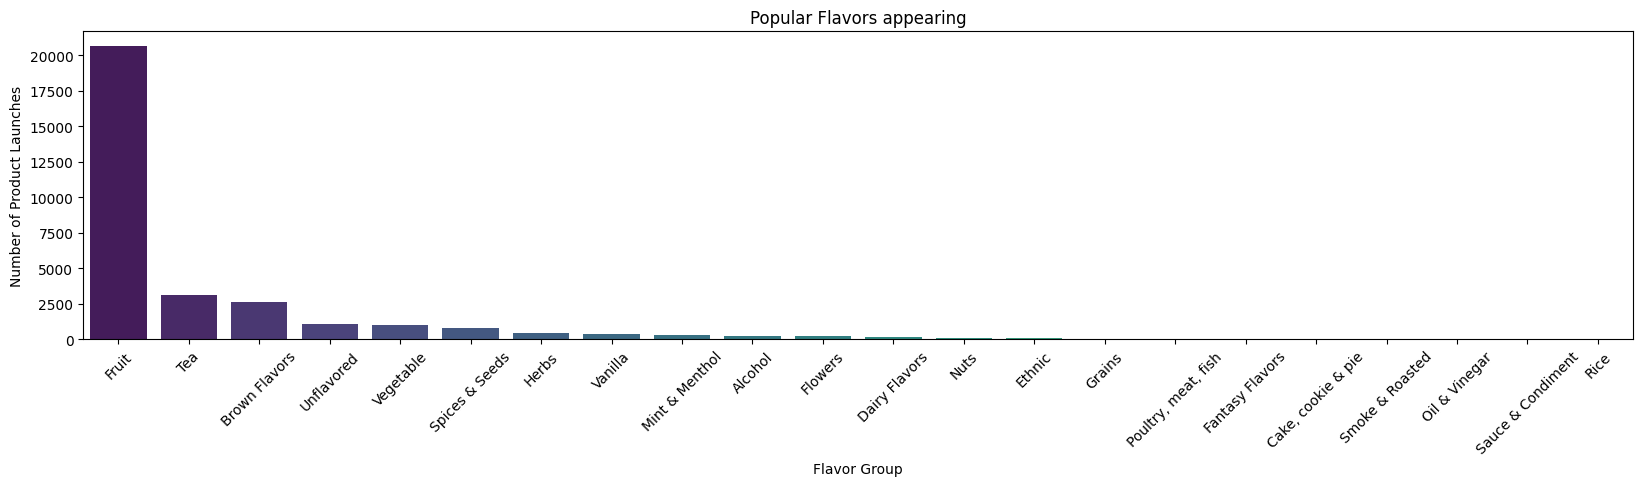

In [22]:
# Explore and visualize the distribution of flavors in North America
flavor_distribution = product_flavor_group['Flavor_Group'].value_counts()
plt.figure(figsize=(20, 4))
sns.barplot(x=flavor_distribution.index, y=flavor_distribution.values, palette='viridis')
plt.title('Popular Flavors appearing')
plt.xlabel('Flavor Group')
plt.ylabel('Number of Product Launches')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Display the data types and format of the 'Launch Date' column
print(product_flavor_group['Launch Date'].dtype)


object


In [24]:
# Convert 'Launch Date' column to datetime format
product_flavor_group['Launch Date'] = pd.to_datetime(product_flavor_group['Launch Date'])

In [25]:
# Filter data for the last 5 years
last_5_years_df = product_flavor_group[product_flavor_group['Launch Date'] >= pd.to_datetime('2010-01-01') - pd.DateOffset(years=5)]
last_5_years_df.head(5)

,Product id,Market Subcategory,Launch Date,Country,Flavor,Flavor_Group
4180,26772,Carbonates,2008-01-01,NA3,ginger beer,Brown Flavors
4181,26772,Carbonates,2008-01-01,NA3,"rum, not specified",Alcohol
4182,26772,Carbonates,2008-01-01,NA3,"rum, not specified",Alcohol
4591,28420,Drink Concentrates & Mixes,2005-01-01,NA2,lemonade,Fruit
4694,28619,Energy Drinks,2005-01-01,NA2,unflavored,Unflavored


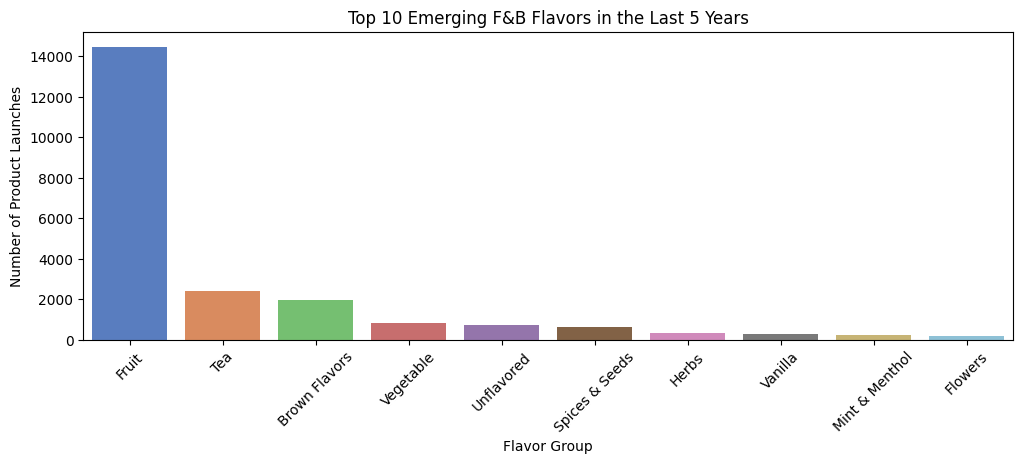

In [26]:
# Identify top 10 emerging flavors
top_10_flavors = last_5_years_df['Flavor_Group'].value_counts().head(10)
plt.figure(figsize=(12, 4))
sns.barplot(x=top_10_flavors.index, y=top_10_flavors.values, palette='muted')
plt.title('Top 10 Emerging F&B Flavors in the Last 5 Years')
plt.xlabel('Flavor Group')
plt.ylabel('Number of Product Launches')
plt.xticks(rotation=45)
plt.show()

### Checking Market Share and Market Segment


In [27]:
Market_Category_data = product_flavor_group[['Product id', 'Market Subcategory', 'Launch Date',]]

In [28]:
# Convert 'Launch Date' to datetime
Market_Category_data['Launch Date'] = pd.to_datetime(Market_Category_data['Launch Date'])

# Extract 'Year' from 'Launch Date'
Market_Category_data['Year'] = Market_Category_data['Launch Date'].dt.year

# Count distinct number of products for each market category grouped on year
Market_growth = Market_Category_data.groupby(['Market Subcategory', 'Year'])['Product id'].nunique().reset_index()
Market_growth = Market_growth.rename(columns={'Product id': 'Distinct_Products'})

# Cumulative count of distinct products
Market_growth['Cumulative_Count'] = Market_growth.groupby('Market Subcategory')['Distinct_Products'].cumsum()

# % change year on year for cumulative count
Market_growth['%Change_YoY'] = Market_growth.groupby('Market Subcategory')['Cumulative_Count'].pct_change() * 100


In [29]:
# Total # of distinct products for all categories on a yearly basis
total_distinct_products = Market_growth.groupby('Year')['Distinct_Products'].sum().reset_index()
total_distinct_products = total_distinct_products.rename(columns={'Distinct_Products': 'Total_Distinct_Products'})

In [30]:
# Merge the DataFrames
Market_growth_df = pd.merge(Market_growth, total_distinct_products, on='Year', how='left')

# % of market share of that market category on a yearly basis
Market_growth_df['%Market_Share'] = (Market_growth_df['Cumulative_Count'] / Market_growth_df['Total_Distinct_Products']) * 100

Market_growth_df.head(10)

,Market Subcategory,Year,Distinct_Products,Cumulative_Count,%Change_YoY,Total_Distinct_Products,%Market_Share
0,Bottled Water - Flavoured,2001,175,175,NaN,1623,10.782502
1,Bottled Water - Flavoured,2002,135,310,77.142857,1734,17.877739
2,Bottled Water - Flavoured,2003,216,526,69.677419,1630,32.269939
3,Bottled Water - Flavoured,2004,172,698,32.699620,1611,43.327126
4,Bottled Water - Flavoured,2005,205,903,29.369628,1926,46.884735
5,Bottled Water - Flavoured,2006,161,1064,17.829457,2001,53.173413
6,Bottled Water - Flavoured,2007,125,1189,11.748120,1681,70.731707
7,Bottled Water - Flavoured,2008,193,1382,16.232128,1944,71.090535
8,Bottled Water - Flavoured,2009,218,1600,15.774240,3071,52.100293
9,Bottled Water - Flavoured,2010,233,1833,14.562500,2864,64.001397


In [31]:
# Save the Data as CSV for Visualization
#Market_growth_df.to_csv('Market_growth_yoy.csv')